# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [12]:
 % matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import random
from scipy.stats import t, norm



In [13]:
df = pd.io.stata.read_stata('../data/us_job_market_discrimination.dta')

In [15]:
# number of callbacks for black-sounding names
sum(df[df.race=='w'].call)

235.0

In [16]:
df.head()


,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [17]:
(rows, cols) = data.shape
print("There are a total of {} observations in the data set ".format(rows))

There are a total of 4870 observations in the data set 


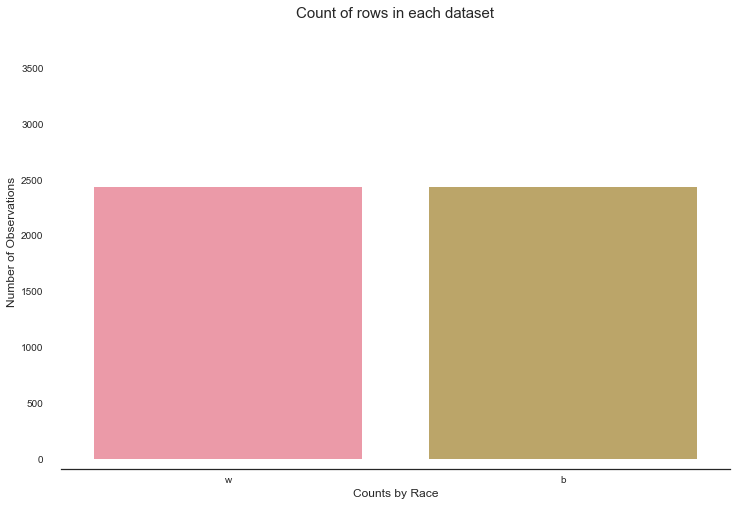

In [18]:
color = sns.color_palette()
sns.set(style="white")
cnt_srs = df.race.value_counts()

plt.figure(figsize=(12,8))
with sns.color_palette("husl"):
 sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Observations', fontsize=12)
plt.xlabel('Counts by Race', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
sns.set_style("whitegrid")
sns.despine(offset=10)
sns.despine(left=True)

plt.margins(0.6)

plt.show()

__Fig. 1__: (above) There are 4870 observations and an equal number of observations grouped by race - 'b'(Blacks) and 'w'(Whites). 

<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
What test is appropriate for this problem? Does CLT apply?
What are the null and alternate hypotheses?

</div>

#### There are 4870 observations in the data-set. N > 30.  
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call( success)  from employers or not(fail). The callbacks are categorical. Hence, we would use proportions.  Yes, The Central Limit Theorem does apply. The sampling distribution of propotions is very nearly normal for N >=30 even when the population is non-normal. Therefore a z-test is appropriate 

Here are the hypotheses
#### H<sub>0</sub> : Race does not have any impact on the callbacks for resume( claim )
#### H<sub>a </sub>: Race does have significant impact on callbacks for resume

In [22]:
# let's seperate the data frames by race
df_w = df[df.race=='w']
df_b = df[df.race=='b']

Next we calculate the proportions 

In [24]:
#Calculating the proportions per racial group 
prop_b = ((sum(df_b.call))/(len(df_b.call)))
prop_w = ((sum(df_w.call))/(len(df_w.call)))
prop_b, prop_w # p-hats for both black and white

(0.064476386036960986, 0.096509240246406572)

It is observed that the callback on resumes with black sounding names  have lower propotion of success of __6.45% vs. 9.65%__ success for white sounding names'

### Calculations of test statistic

 We choose the test statistic to be a difference in the proportions of the Black population and White population.
 Under the null hypothesis the difference in mean of these proportions  will be 0
 
 Let's begin by calculating the proportions  of success of both black and white sounding named samples together
 
 


In [29]:
p_both = sum(df.call)/len(df.call)
print("The proportion of the successful callbacks is {} ".format(p_both))

The proprtion of the successful callbacks is 0.08049281314168377 


#### Standard Deviation 

Next, let us caclulate the Standard Deviation of the test statistic( difference in proportions)

se_both = np.sqrt(pq/Nb + pq/Nw)

In [37]:
se_both = np.sqrt((p_both*(1 - p_both)/(len(df_b))) + (p_both*(1 - p_both) /(len(df_w))))
print("The standard deviation  is {} ".format(se_both))
 

The standard deviation  is 0.007796894036170457 


#### Margin of Error 

The Margin of error at 0.05 significance level or at 95% confidence interval is  1.96 * se_both
print("The proportion of the successful callbacks is {} ".format(p_both))


In [41]:
ME = 1.96 * se_both
print("The Margin of error is {} ".format(ME))

The Margin of error is 0.015281912310894095 


#### Confidence Interval

In [45]:
#### Confidence Interval 
test_replicate = prop_b - prop_w
print("The Confidence Interval is of error is Pa-b +/- ME".format(test_replicate,ME)) 
print("The Confidence Interval is of error is {} +/- {}".format(test_replicate,ME)) 

The Confidence Interval is of error is Pa-b +/- ME
The Confidence Interval is of error is -0.032032854209445585 +/- 0.015281912310894095


#### z - statistic

The z statistic would then be caclulated as follows

z =  <hat>P</hat> - u / SE

In [48]:
P = prop_w - prop_b
u = 0 ## Under null hypothesis the difference is 0
SE = se_both

z_stat = (P - u) / (SE)

print("The z-stat  is {} ".format(z_stat))

The z-stat  is 4.108412152434346 


#### p-value
Finally, let's compute the p-value 

In [34]:
p  = stats.norm.sf(abs(z_stat))*2 #twoside
print("The p-value  is {} ".format(p))

The p-value  is 3.983886837585077e-05 


With a p-value of 0.000098388, at a significance level of 0.025( two tailed ), we __reject the null hypothesis claim __  and conclude that there is a significant difference between black-sounding and white-sounding names in the number of callbacks of resumes.

## CONCLUSION
<div class="span5 alert alert-success">
<p> SUMMARY </p>
With a p-value of 0.000098388, at a significance level of 0.025 ( two tailed ), we reject the null hypothesis claim and conclude that there is a significant difference between black-sounding and white-sounding names in the number of callbacks of resumes. We can clainm that based in the race, there is a perceived bias in callbacks received for White-sounding names vs. black.sounding.
 
</div>

